# Ejercico 1-2 Prueba de bondad de ajuste


## Enunciado

Se realizan 1000 ensayos de arrojar cinco (5) monedas y se registra el número de caras obtenidas. A continuación, se detallan las cantidades obtenidas:

| Numero de Caras Obtenidas | Frecuencia Observada |
| ------------------------- | -------------------- |
| 0                         | 38                   |
| 1                         | 144                  |
| 2                         | 342                  |
| 3                         | 287                  |
| 4                         | 164                  |
| 5                         | 25                   |


## Declaraciones de variables y bibliotecas


### Bibliotecas necesarias


In [5]:
from scipy.stats import binom, chi2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

### Declaraciones de Variables


In [52]:
clases = list([ (0, 1, 2, 3,  4, 5 ),
                (38, 144, 342, 287, 164, 25) ,
                (0, 0, 0, 0,  0, 0 )])

ensayos = 1000
clases[2] = [x/ensayos for x in clases[1]]
n = 5
alfaChi2 = 0.1
prob_exito_muestra = 0.5


## Representación Gráfica


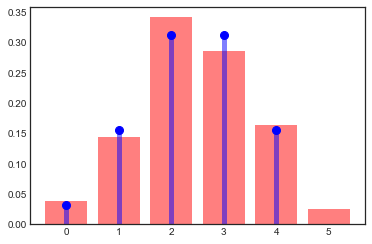

In [53]:
x = np.arange(binom.ppf(0.01, n, prob_exito_muestra),
              binom.ppf(0.99, n, prob_exito_muestra))

curva_binomial = binom.pmf(x, n, prob_exito_muestra)

plt.style.use('seaborn-white')
plt.plot(x, curva_binomial, 'bo', ms=8)
plt.vlines(x, 0, curva_binomial, colors='b', lw=5, alpha=0.5)
plt.bar(clases[0], clases[2], color='r', alpha=0.5)
plt.show()

## Cálculos


In [55]:

# clases es un array con dos elementos:
# clases[0] = frecuencias observadas
# clases[1] = limite inferior de cada intervalo
repeticiones = clases[0]
valores_observados = clases[1]
probabilidad_muestral = clases[2]
tabla_histograma = list(zip(repeticiones,valores_observados))
print(tabulate(tabla_histograma, ['Repeticiones', 'Frecuencia Observadas'], tablefmt="github"))


|   Repeticiones |   Frecuencia Observadas |
|----------------|-------------------------|
|              0 |                      38 |
|              1 |                     144 |
|              2 |                     342 |
|              3 |                     287 |
|              4 |                     164 |
|              5 |                      25 |


In [59]:
prob_intervalos = []
prob_acumulada = 0

for(i) in range(len(clases[1])):
    prob = binom.pmf(clases[0][i], n, prob_exito_muestra)
    print('P(X = ', clases[0][i], ') = ', prob)
    prob_intervalos.append(prob)
    prob_acumulada += prob

prob_acumulada += prob
print("Acumulado Total = {m}".format(m=prob_acumulada))

valores_esperados = []
for(i) in prob_intervalos:
    valores_esperados.append(i*ensayos)


P(X =  0 ) =  0.03125
P(X =  1 ) =  0.15624999999999997
P(X =  2 ) =  0.31249999999999983
P(X =  3 ) =  0.31249999999999983
P(X =  4 ) =  0.15625
P(X =  5 ) =  0.03125
Acumulado Total = 1.0312499999999996


In [60]:
tableData = list(zip(repeticiones, valores_observados, prob_intervalos, valores_esperados))
print(tabulate(tableData, ['Repeticiones', 'Valores', 'Prob', 'Esperado'], tablefmt="github"))

|   Repeticiones |   Valores |    Prob |   Esperado |
|----------------|-----------|---------|------------|
|              0 |        38 | 0.03125 |      31.25 |
|              1 |       144 | 0.15625 |     156.25 |
|              2 |       342 | 0.3125  |     312.5  |
|              3 |       287 | 0.3125  |     312.5  |
|              4 |       164 | 0.15625 |     156.25 |
|              5 |        25 | 0.03125 |      31.25 |


In [61]:
chiDePrueba = 0
for(i) in range(len(valores_esperados)):
    chiDePrueba += ((valores_esperados[i] - valores_observados[i])**2)/valores_esperados[i]

print("Chi de Prueba = {m}".format(m=chiDePrueba))

Chi de Prueba = 8.918400000000002


In [62]:
chi2Critico = chi2.ppf(1-alfaChi2, len(valores_esperados)-1)

print("Chi2 Critico = {m}".format(m=chi2Critico))

Chi2 Critico = 9.236356899781123


## Conclusión


In [63]:
if chiDePrueba > chi2Critico:
    print("Se rechaza la hipotesis nula")
else:
    print("No se puede rechazar la hipotesis nula")

No se puede rechazar la hipotesis nula
